In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from typing import Tuple, List, Optional

In [58]:
# Load the dataset
df = pd.read_csv('train.csv')
df.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,San Mateo,4849,Two Year,United States,...,25,2191.15,0,486.00,0.0,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,Sutter Creek,3715,Month-to-Month,United States,...,35,3418.20,0,1596.70,0.0,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,Santa Cruz,5092,Month-to-Month,United States,...,46,851.20,0,739.22,0.0,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,Brea,2068,One Year,United States,...,27,1246.40,30,0.00,0.0,1276.40,1,0,92823,0
4,31,21,17.22,Dissatisfaction,Network reliability,88,San Jose,4026,One Year,United States,...,58,3563.80,0,998.76,0.0,4562.56,0,1,95117,1


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 52 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4225 non-null   int64  
 1   Avg Monthly GB Download            4225 non-null   int64  
 2   Avg Monthly Long Distance Charges  4225 non-null   float64
 3   Churn Category                     1121 non-null   object 
 4   Churn Reason                       1121 non-null   object 
 5   Churn Score                        4225 non-null   int64  
 6   City                               4225 non-null   object 
 7   CLTV                               4225 non-null   int64  
 8   Contract                           4225 non-null   object 
 9   Country                            4225 non-null   object 
 10  Customer ID                        4225 non-null   object 
 11  Customer Status                    4225 non-null   objec

In [60]:
df.describe()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Score,CLTV,Dependents,Device Protection Plan,Internet Service,Latitude,Longitude,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,...,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
mean,46.451124,20.740828,22.766963,58.281183,4409.751243,0.233136,0.346982,0.790296,36.207274,-119.768187,...,32.681893,2306.078107,6.965680,754.719141,1.953846,3065.809082,0.200000,0.677870,93491.892781,0.265325
std,16.731518,20.366105,15.429992,21.197931,1170.599119,0.422878,0.476066,0.407146,2.471090,2.154078,...,24.621041,2271.448881,25.250169,854.909725,7.814374,2884.817379,0.400047,0.467348,1863.337187,0.441559
min,19.000000,0.000000,0.000000,5.000000,2003.000000,0.000000,0.000000,0.000000,32.555828,-124.301372,...,1.000000,18.800000,0.000000,0.000000,0.000000,21.360000,0.000000,0.000000,90001.000000,0.000000
25%,32.000000,4.000000,9.050000,40.000000,3493.000000,0.000000,0.000000,1.000000,33.994524,-121.788090,...,9.000000,401.500000,0.000000,67.680000,0.000000,592.750000,0.000000,0.000000,92102.000000,0.000000
50%,46.000000,17.000000,22.570000,61.000000,4531.000000,0.000000,0.000000,1.000000,36.205465,-119.622676,...,30.000000,1424.600000,0.000000,396.640000,0.000000,2151.470000,0.000000,1.000000,93513.000000,0.000000
75%,60.000000,27.000000,36.170000,75.000000,5381.000000,0.000000,1.000000,1.000000,38.196497,-117.991372,...,56.000000,3846.750000,0.000000,1200.000000,0.000000,4845.750000,0.000000,1.000000,95337.000000,1.000000
max,80.000000,85.000000,49.990000,96.000000,6500.000000,1.000000,1.000000,1.000000,41.962127,-114.192901,...,72.000000,8672.450000,150.000000,3564.000000,49.790000,11979.340000,1.000000,1.000000,96150.000000,1.000000


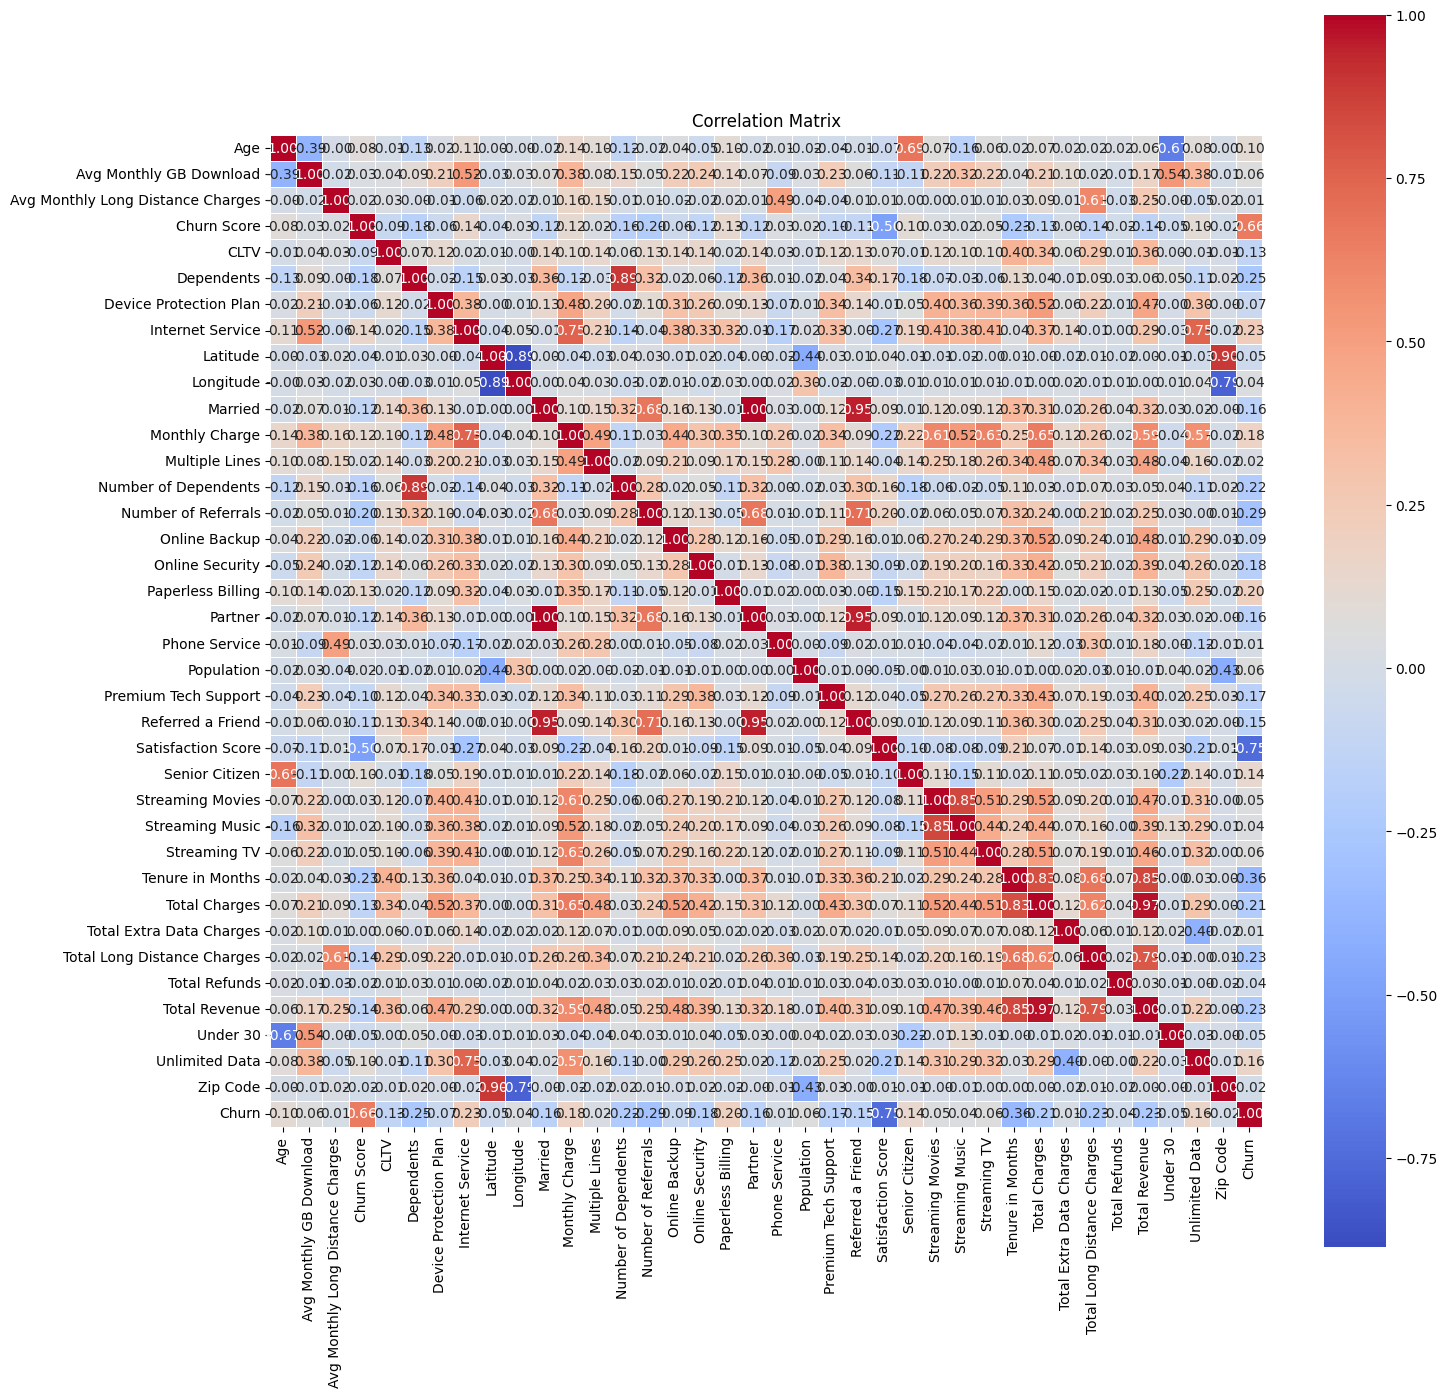

In [61]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(16, 16))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',square=True,linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [62]:
# Encode categorical variables using Ordinal Encoding
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])
df

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code,Churn
0,72,4,19.44,NaN,NaN,51,853.0,4849,2.0,0.0,...,25,2191.15,0,486.00,0.00,2677.15,0,1,94403,0
1,27,59,45.62,NaN,NaN,27,955.0,3715,0.0,0.0,...,35,3418.20,0,1596.70,0.00,5014.90,1,1,95685,0
2,59,0,16.07,NaN,NaN,59,867.0,5092,0.0,0.0,...,46,851.20,0,739.22,0.00,1590.42,0,0,95064,0
3,25,27,0.00,NaN,NaN,49,109.0,2068,1.0,0.0,...,27,1246.40,30,0.00,0.00,1276.40,1,0,92823,0
4,31,21,17.22,2.0,14.0,88,843.0,4026,1.0,0.0,...,58,3563.80,0,998.76,0.00,4562.56,0,1,95117,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4220,36,0,7.76,NaN,NaN,52,535.0,4590,0.0,0.0,...,1,19.90,0,7.76,0.00,27.66,0,0,90806,0
4221,77,22,23.43,NaN,NaN,34,837.0,5602,1.0,0.0,...,22,1820.90,0,515.46,29.88,2306.48,0,1,94127,0
4222,56,0,28.06,NaN,NaN,63,683.0,4458,1.0,0.0,...,18,345.90,0,505.08,0.00,850.98,0,0,95961,0
4223,45,22,0.00,NaN,NaN,38,1043.0,4115,0.0,0.0,...,57,3437.45,0,0.00,0.00,3437.45,0,1,91361,0


In [63]:
# Handle missing values
df.fillna(0, inplace=True)
df.isna().sum()/len(df) * 100

Age                                  0.0
Avg Monthly GB Download              0.0
Avg Monthly Long Distance Charges    0.0
Churn Category                       0.0
Churn Reason                         0.0
Churn Score                          0.0
City                                 0.0
CLTV                                 0.0
Contract                             0.0
Country                              0.0
Customer ID                          0.0
Customer Status                      0.0
Dependents                           0.0
Device Protection Plan               0.0
Gender                               0.0
Internet Service                     0.0
Internet Type                        0.0
Lat Long                             0.0
Latitude                             0.0
Longitude                            0.0
Married                              0.0
Monthly Charge                       0.0
Multiple Lines                       0.0
Number of Dependents                 0.0
Number of Referr

In [74]:
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()
standard_df_scaled = pd.DataFrame(standard_scaler.fit_transform(df.drop('Churn', axis=1)), columns=df.drop('Churn', axis=1).columns)
minmax_df_scaled = pd.DataFrame(minmax_scaler.fit_transform(df.drop('Churn', axis=1)), columns=df.drop('Churn', axis=1).columns)
maxabs_df_scaled = pd.DataFrame(maxabs_scaler.fit_transform(df.drop('Churn', axis=1)), columns=df.drop('Churn', axis=1).columns)
maxabs_df_scaled.head()

,Age,Avg Monthly GB Download,Avg Monthly Long Distance Charges,Churn Category,Churn Reason,Churn Score,City,CLTV,Contract,Country,...,Streaming TV,Tenure in Months,Total Charges,Total Extra Data Charges,Total Long Distance Charges,Total Refunds,Total Revenue,Under 30,Unlimited Data,Zip Code
0,0.9000,0.047059,0.388878,0.0,0.000000,0.531250,0.786900,0.746000,1.0,0.0,...,0.0,0.347222,0.252656,0.0,0.136364,0.0,0.223481,0.0,1.0,0.981830
1,0.3375,0.694118,0.912583,0.0,0.000000,0.281250,0.880996,0.571538,0.0,0.0,...,1.0,0.486111,0.394145,0.0,0.448008,0.0,0.418629,1.0,1.0,0.995164
2,0.7375,0.000000,0.321464,0.0,0.000000,0.614583,0.799815,0.783385,0.0,0.0,...,0.0,0.638889,0.098150,0.0,0.207413,0.0,0.132764,0.0,0.0,0.988705
3,0.3125,0.317647,0.000000,0.0,0.000000,0.510417,0.100554,0.318154,0.5,0.0,...,0.0,0.375000,0.143719,0.2,0.000000,0.0,0.106550,1.0,0.0,0.965398
4,0.3875,0.247059,0.344469,0.5,0.736842,0.916667,0.777675,0.619385,0.5,0.0,...,0.0,0.805556,0.410933,0.0,0.280236,0.0,0.380869,0.0,1.0,0.989256


In [65]:
# check data imblance in target variable
churn_counts = df['Churn'].value_counts()
print("Before SMOTE: counts of label '1': {}".format(churn_counts[1]))
print("Before SMOTE: counts of label '0': {} \n".format(churn_counts[0]))

Before SMOTE: counts of label '1': 1121
Before SMOTE: counts of label '0': 3104 



In [66]:
# Apply SMOTE to balance the training dataset
sm = SMOTE(random_state=42)
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']
X, y = sm.fit_resample(X_train, y_train)
print("After SMOTE: counts of label '1': {}".format(sum(y == 1)))
print("After SMOTE: counts of label '0': {} \n".format(sum(y == 0)))

After SMOTE: counts of label '1': 3104
After SMOTE: counts of label '0': 3104 



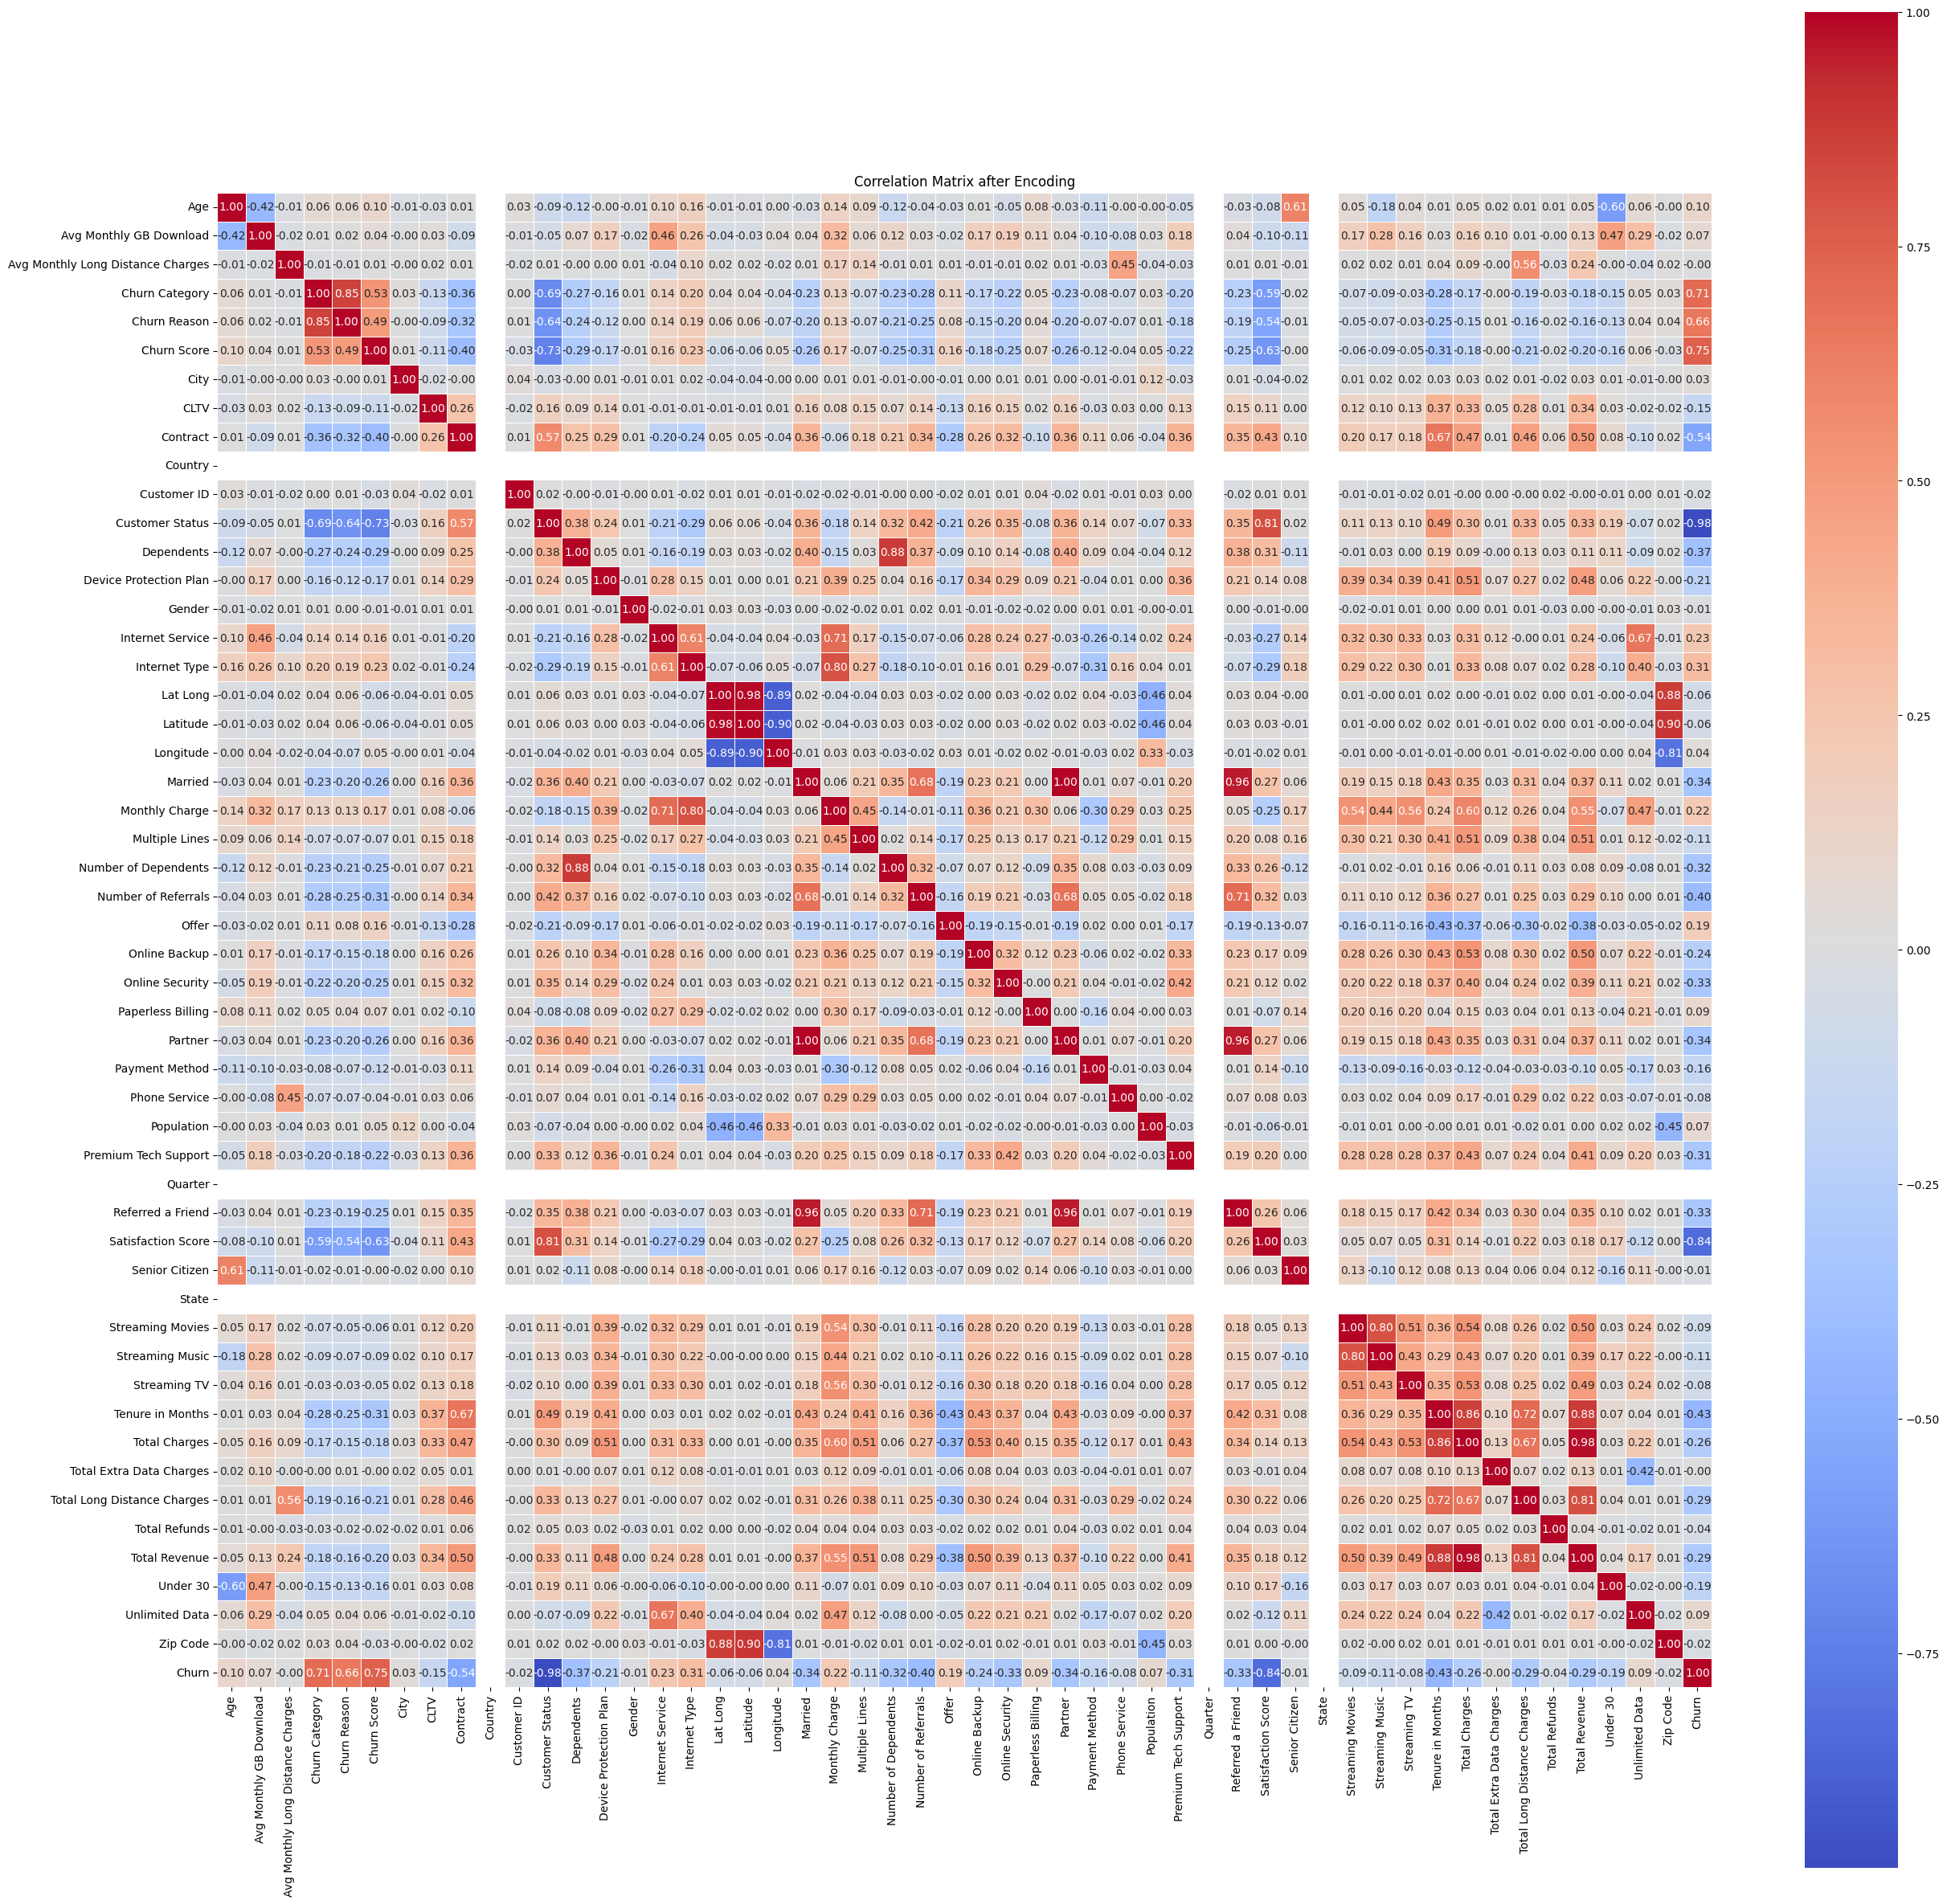

In [67]:
df = pd.concat([X, y], axis=1)
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm',square=True,linewidths=.5)
plt.title('Correlation Matrix after Encoding')
plt.show()

In [68]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=10) 
X_new = selector.fit_transform(df.drop('Churn', axis=1), df['Churn'])
selected_features = df.drop('Churn', axis=1).columns[selector.get_support()]
print("Top 10 cofeatures selected:", selected_features)

Top 10 cofeatures selected: Index(['Churn Category', 'Churn Reason', 'Churn Score', 'Contract',
       'Customer Status', 'Dependents', 'Number of Referrals', 'Partner',
       'Satisfaction Score', 'Tenure in Months'],
      dtype='object')


c:\Machine-Learning\Final-Project\telco-customer-churn-project\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [ 9 34 38] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Machine-Learning\Final-Project\telco-customer-churn-project\.venv\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [69]:
corr_target = df.corr()['Churn'].abs()
top_features = corr_target[corr_target >= 0.30].index.tolist()
print("Top features correlated with 'Churn':", top_features)


Top features correlated with 'Churn': ['Churn Category', 'Churn Reason', 'Churn Score', 'Contract', 'Customer Status', 'Dependents', 'Internet Type', 'Married', 'Number of Dependents', 'Number of Referrals', 'Online Security', 'Partner', 'Premium Tech Support', 'Referred a Friend', 'Satisfaction Score', 'Tenure in Months', 'Churn']


In [70]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
feature_importances = model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
feature_importances = [index for index in sorted_indices]
print("Feature ranking based on Random Forest importance:")
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

Feature ranking based on Random Forest importance:
Churn Reason: 5.0000
Customer Status: 1.0000
Churn Category: 36.0000
Satisfaction Score: 39.0000
Churn Score: 8.0000
Contract: 42.0000
Internet Type: 33.0000
Number of Referrals: 45.0000
Tenure in Months: 31.0000
Dependents: 27.0000
Married: 21.0000
Avg Monthly GB Download: 11.0000
Online Security: 32.0000
Payment Method: 17.0000
Referred a Friend: 37.0000
Number of Dependents: 15.0000
Premium Tech Support: 2.0000
Total Charges: 13.0000
Total Revenue: 49.0000
Partner: 7.0000
Monthly Charge: 25.0000
Offer: 50.0000
Age: 4.0000
Internet Service: 23.0000
Total Long Distance Charges: 26.0000
Zip Code: 9.0000
Latitude: 47.0000
Population: 10.0000
Longitude: 29.0000
CLTV: 24.0000
Lat Long: 43.0000
City: 16.0000
Customer ID: 20.0000
Avg Monthly Long Distance Charges: 3.0000
Under 30: 38.0000
Senior Citizen: 22.0000
Streaming Movies: 41.0000
Multiple Lines: 0.0000
Total Extra Data Charges: 46.0000
Streaming TV: 14.0000
Paperless Billing: 19.000

In [ ]:
# Final Dataset after selecting important features
final_features = X.columns[feature_importances[:10]]
df_final = df[final_features.tolist() + ['Churn']]
df_final.head()

,Churn Reason,Customer Status,Churn Category,Satisfaction Score,Churn Score,Contract,Internet Type,Number of Referrals,Tenure in Months,Dependents,Churn
0,0.0,2.0,0.0,3,51,2.0,2.0,1,25,0,0
1,0.0,2.0,0.0,3,27,0.0,2.0,0,35,0,0
2,0.0,2.0,0.0,5,59,0.0,0.0,3,46,0,0
3,0.0,2.0,0.0,4,49,1.0,1.0,3,27,0,0
4,14.0,0.0,2.0,2,88,1.0,0.0,1,58,0,1
